In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy.linalg import norm

In [5]:
# Solução analítica
def analytical_solution(y):
    return 0.5*(1 + y / h) + P*(1 - y**2/hsq)

def resolve_sistema(M, a_P):
    # Criação da matriz A e vetor b
    A = np.zeros((M, M))
    b = np.zeros(M)

    # Preenchimento da matriz A e vetor b
    for j in range(1, M - 1):
        A[j, j] = 1
        A[j, j + 1] = -0.5
        A[j, j - 1] = -0.5
        b[j] = a_P

    # Condições de contorno
    A[0, 0] = 1
    b[0] = 0
    A[M - 1, M - 1] = 1
    b[M - 1] = 1

    # Solução do sistema (obtém a solução exata para o istema matricial)
    u = np.linalg.solve(A, b)

    return u



A velocidade máxima em r=0.6428m é u(0)=2.0417m/s


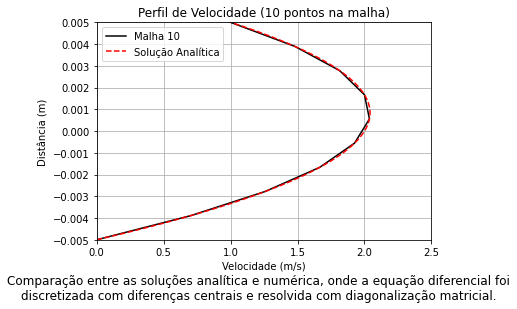



A velocidade máxima em r=0.0539m é u(0)=2.0417m/s


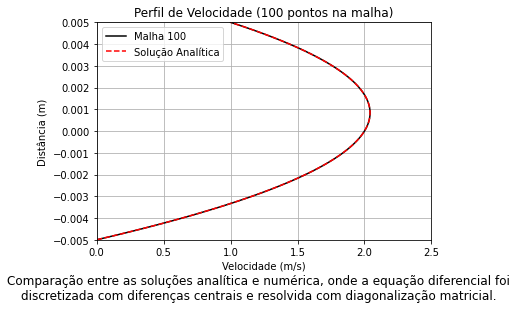



A velocidade máxima em r=0.0008m é u(0)=2.0417m/s


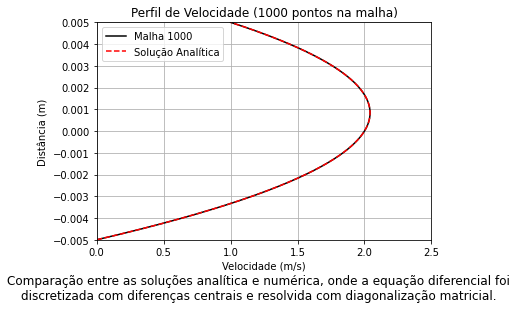

In [11]:
# Parâmetros do problema
h2 = 0.01 # Distancia entre as placas (em metros)
h = 0.5 * h2
hsq = h * h
mu = 1.49 # Viscosidade dinâmica da glicerina (em kg/m/s)
dp_dx = -178800 # Gradiente de pressão (em Pa/m)
U_up = 1.0 # velocidade da placa superior (em m/s)
P = -dp_dx * hsq / (2 * mu * U_up)

# Definição da malha (3 valores distintos para comparação)
num_points = [10,100,1000] # Número de pontos na malha

# Loop para diferentes malhas
for num in num_points:
    # Discretização da malha
    y = np.linspace(-h, h, num)
    y_a = np.linspace(-h,h,1000)
    # Definição dos passos de discretização
    dy = y[1] - y[0]
    a_P = -(dy*dy*dp_dx)/(2*mu)
    
    # Resolve um sistema linear do tipo A.u = b
    u = resolve_sistema(num, a_P)
    
    # Plot dos resultados numéricos e analíticos
    y_min = -h
    y_max = h
    x_min = 0
    x_max = 2.5
    
    #Velocidade máxima:
    u_max = max(analytical_solution(y_a))
    y_u_max = np.argmax(analytical_solution(y_a))*dy + y_min
    print("\n")
    print(f"A velocidade máxima em r={y_u_max:.4f}m é u(0)={u_max:.4f}m/s")
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Controle dos ticks do eixo x e y
    x_ticks = np.linspace(x_min, x_max, 6)
    y_ticks = np.linspace(y_min, y_max, 11)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.plot(u, y, label='Malha {}'.format(num), color='black')
    
    plt.plot(analytical_solution(y_a), y_a, '--', label='Solução Analítica',color='red')
    plt.ylabel('Distância (m)')
    plt.xlabel('Velocidade (m/s)')
    plt.legend()
    plt.title('Perfil de Velocidade ({} pontos na malha)'.format(num))
    plt.title('Perfil de Velocidade ({} pontos na malha)'.format(num))
    txt="Comparação entre as soluções analítica e numérica, onde a equação diferencial foi"
    txt2="discretizada com diferenças centrais e resolvida com diagonalização matricial."
    plt.figtext(0.5, -0.03,txt , ha="center", fontsize=12)
    plt.figtext(0.5, -0.08,txt2 , ha="center", fontsize=12)
    plt.grid(True)
    
    plt.show()
